In [1]:
pip install requests pandas openpyxl


Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install matplotlib pandas plotly


Note: you may need to restart the kernel to use updated packages.


🔄 Downloading data from Binance...
📅 Fetched till: 2020-05-12
📅 Fetched till: 2023-02-06
📅 Fetched till: 2025-04-05
✅ Saved to: C:\Users\Srushti S\OneDrive\Desktop\btc_full_daily_data.xlsx


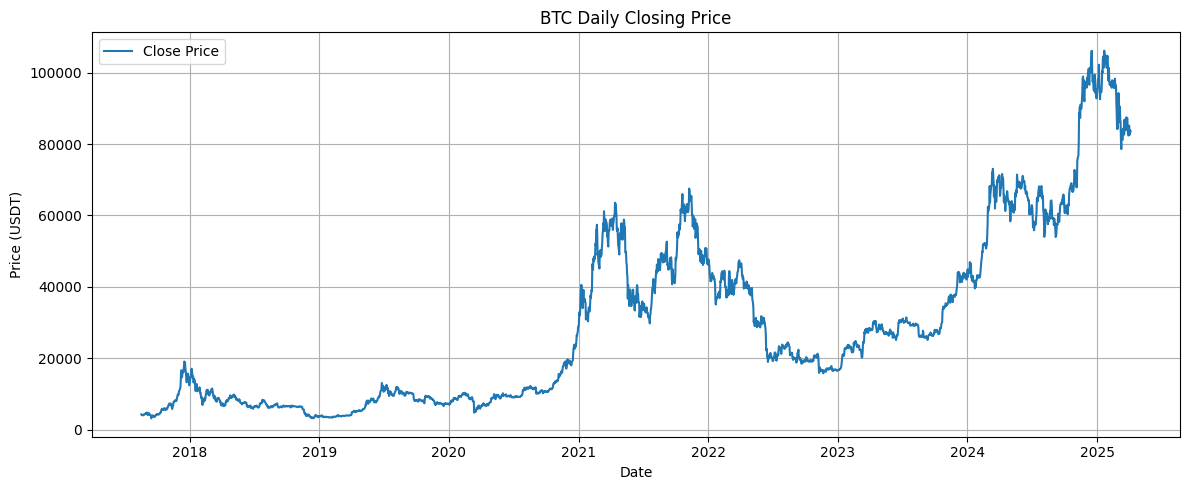

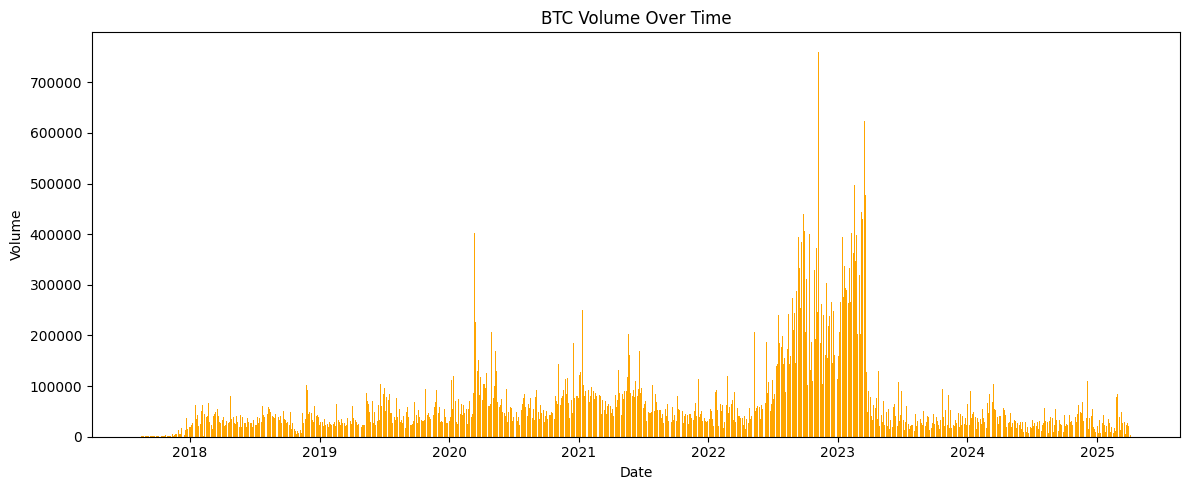

C:\Users\Srushti S\anaconda3\Lib\site-packages\_plotly_utils\basevalidators.py:106: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  v = v.dt.to_pydatetime()


In [6]:
import requests
import pandas as pd
import time
from datetime import datetime
from pathlib import Path
import matplotlib.pyplot as plt
import plotly.graph_objects as go

# -------------------------------
# Setup Desktop path
# -------------------------------
desktop = Path.home() / "Desktop"
if not desktop.exists():
    desktop = Path.home() / "OneDrive" / "Desktop"
output_file = desktop / "btc_full_daily_data.xlsx"

# -------------------------------
# Settings
# -------------------------------
symbol = 'BTCUSDT'
interval = '1d'
start_str = '2017-08-01'

def date_to_ms(date_str):
    return int(datetime.strptime(date_str, "%Y-%m-%d").timestamp() * 1000)

def ms_to_date(ms):
    return datetime.utcfromtimestamp(ms / 1000.0)

url = 'https://api.binance.com/api/v3/klines'
start_ms = date_to_ms(start_str)
end_ms = int(time.time() * 1000)

price_data = []

print("🔄 Downloading data from Binance...")
while start_ms < end_ms:
    params = {
        'symbol': symbol,
        'interval': interval,
        'startTime': start_ms,
        'limit': 1000
    }
    response = requests.get(url, params=params)
    data = response.json()

    if not data:
        break

    for k in data:
        price_data.append({
            'Date': ms_to_date(k[0]),
            'Open': float(k[1]),
            'High': float(k[2]),
            'Low': float(k[3]),
            'Close': float(k[4]),
            'Volume': float(k[5]),
            'Number of Trades': int(k[8])
        })

    print(f"📅 Fetched till: {ms_to_date(data[-1][0]).strftime('%Y-%m-%d')}")
    start_ms = data[-1][6] + 1
    time.sleep(0.4)

# Save to Excel
df = pd.DataFrame(price_data)
df.to_excel(output_file, index=False)
print(f"✅ Saved to: {output_file}")

# -------------------------------
# Plotting
# -------------------------------
df['Date'] = pd.to_datetime(df['Date'])

# Line chart
plt.figure(figsize=(12, 5))
plt.plot(df['Date'], df['Close'], label='Close Price')
plt.title('BTC Daily Closing Price')
plt.xlabel('Date')
plt.ylabel('Price (USDT)')
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()

# Volume chart
plt.figure(figsize=(12, 5))
plt.bar(df['Date'], df['Volume'], color='orange')
plt.title('BTC Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.tight_layout()
plt.show()

# Candlestick chart (interactive)
fig = go.Figure(data=[go.Candlestick(
    x=df['Date'],
    open=df['Open'],
    high=df['High'],
    low=df['Low'],
    close=df['Close'],
    increasing_line_color='green',
    decreasing_line_color='red'
)])
fig.update_layout(title='BTC Candlestick Chart', xaxis_title='Date', yaxis_title='USDT Price')
fig.show()


In [12]:
pip install pandas matplotlib openpyxl xlsxwriter


Note: you may need to restart the kernel to use updated packages.



🔄 Fetching data for BTCUSDT...
  ✅ Up to: 2020-05-12
  ✅ Up to: 2023-02-06
  ✅ Up to: 2025-04-05
📊 Creating dashboard for BTC...


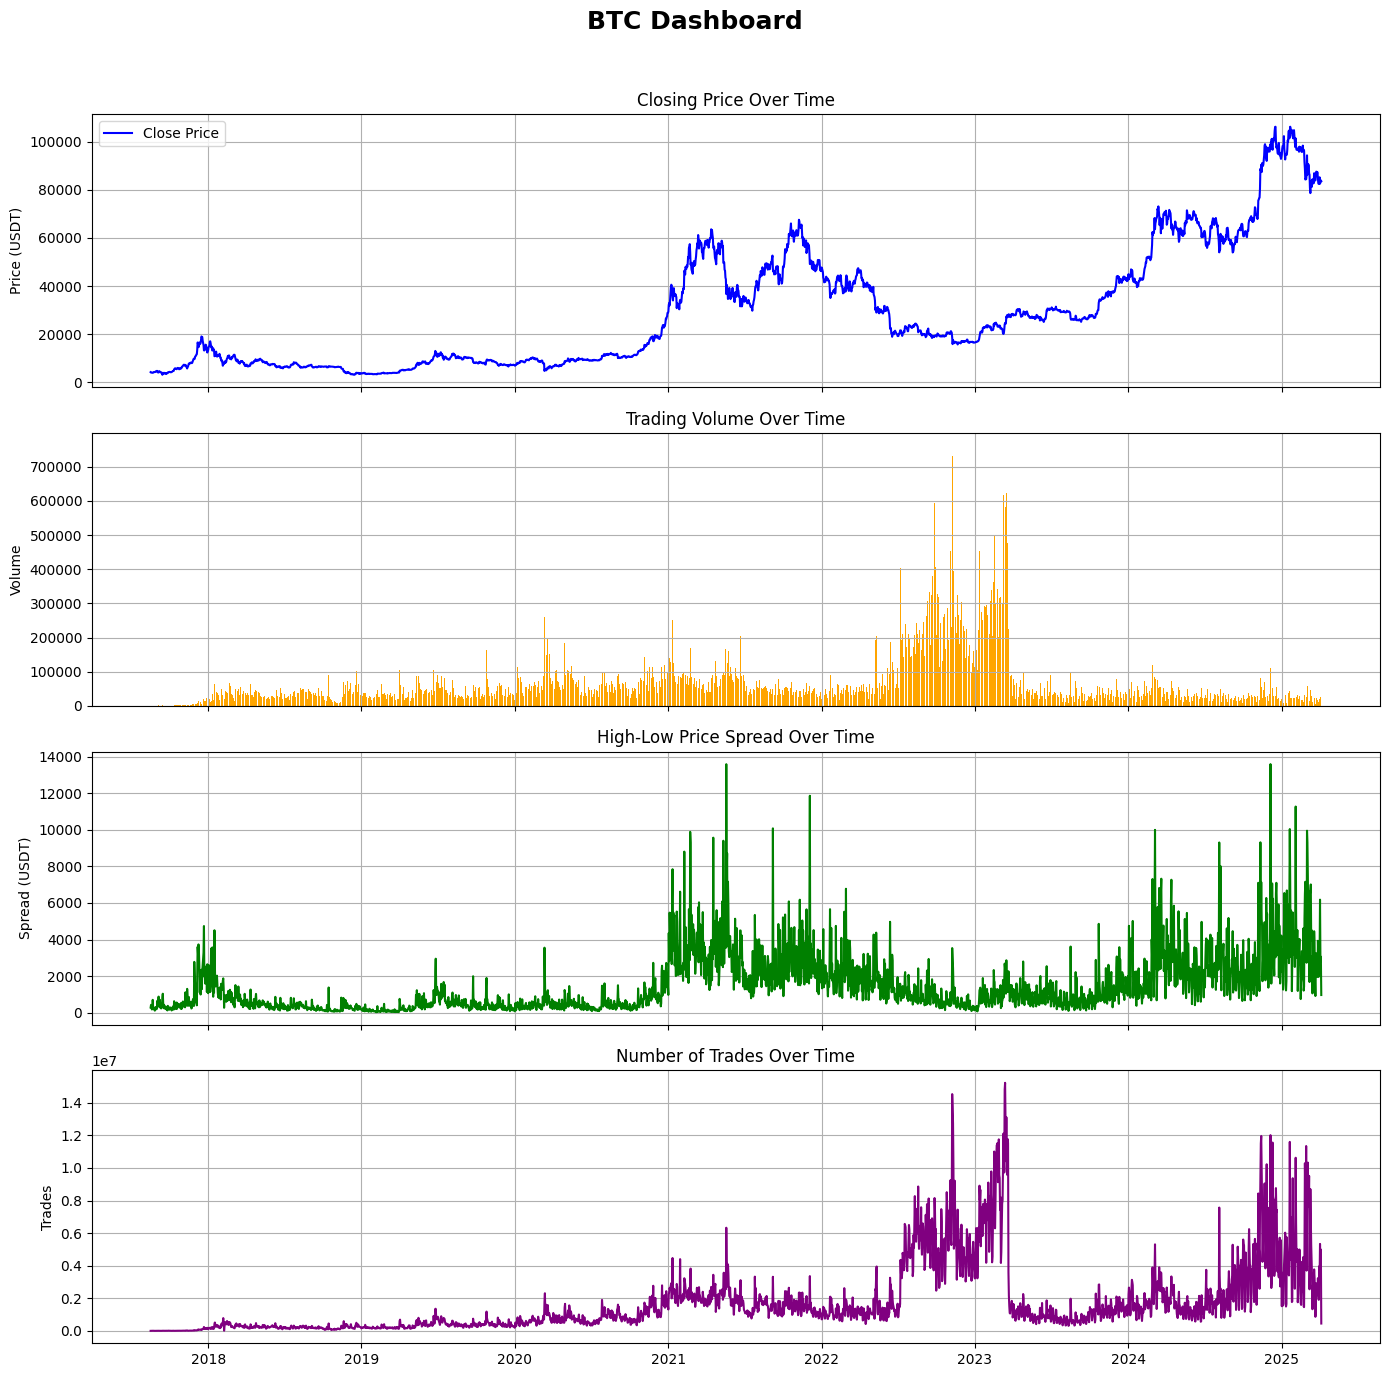


🔄 Fetching data for ETHUSDT...
  ✅ Up to: 2020-05-12
  ✅ Up to: 2023-02-06
  ✅ Up to: 2025-04-05
📊 Creating dashboard for ETH...


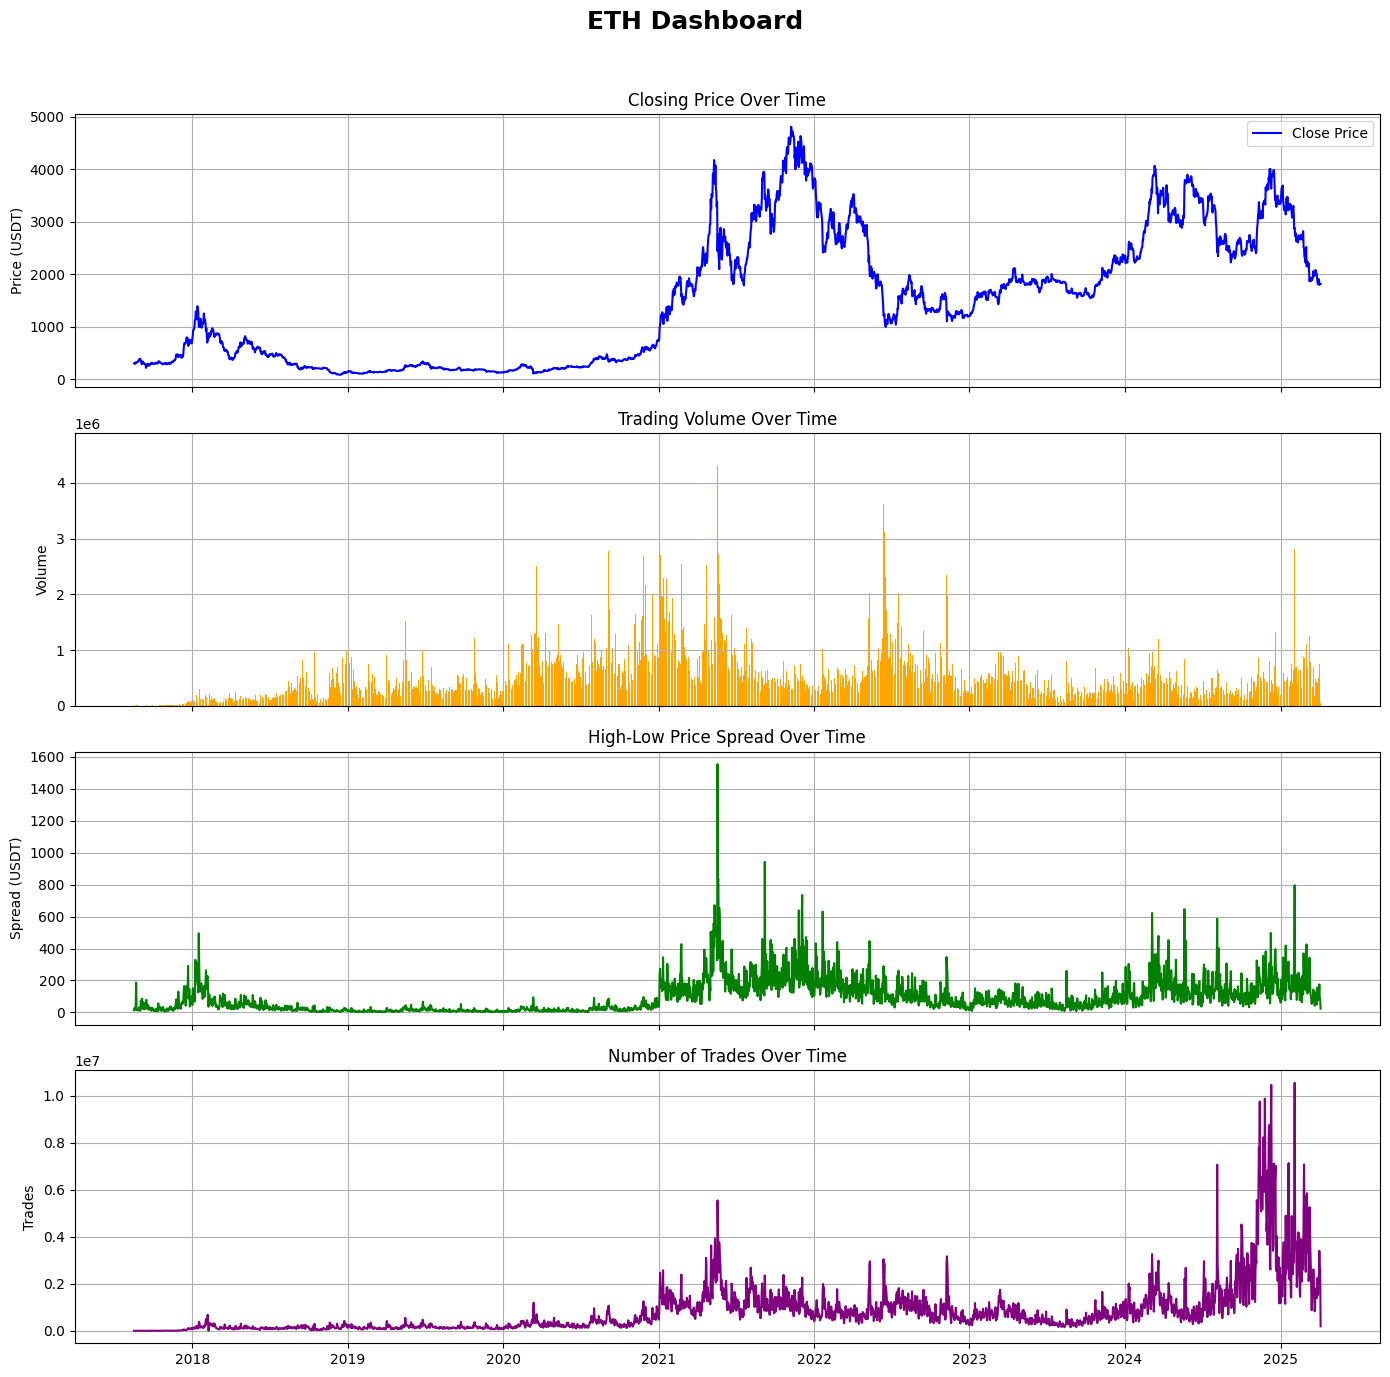


🔄 Fetching data for BNBUSDT...
  ✅ Up to: 2020-08-01
  ✅ Up to: 2023-04-28
  ✅ Up to: 2025-04-05
📊 Creating dashboard for BNB...


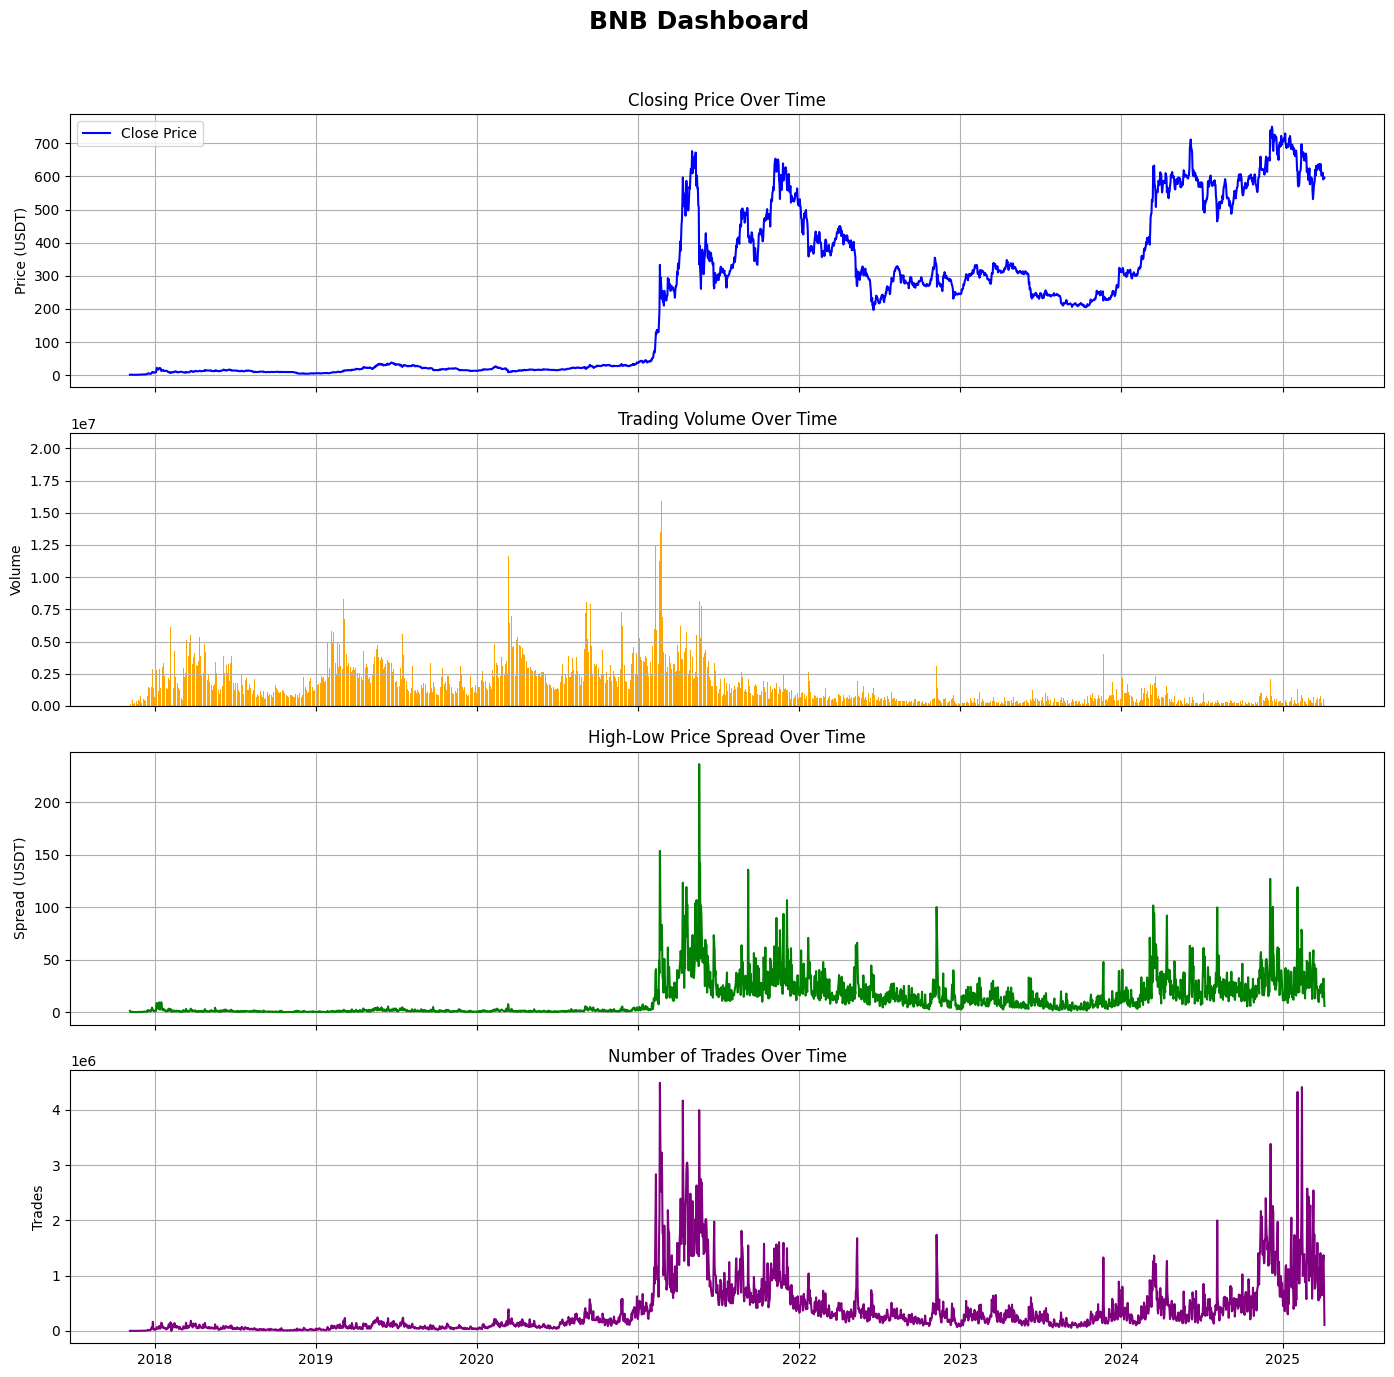


🔄 Fetching data for XRPUSDT...
  ✅ Up to: 2021-01-27
  ✅ Up to: 2023-10-24
  ✅ Up to: 2025-04-05
📊 Creating dashboard for XRP...


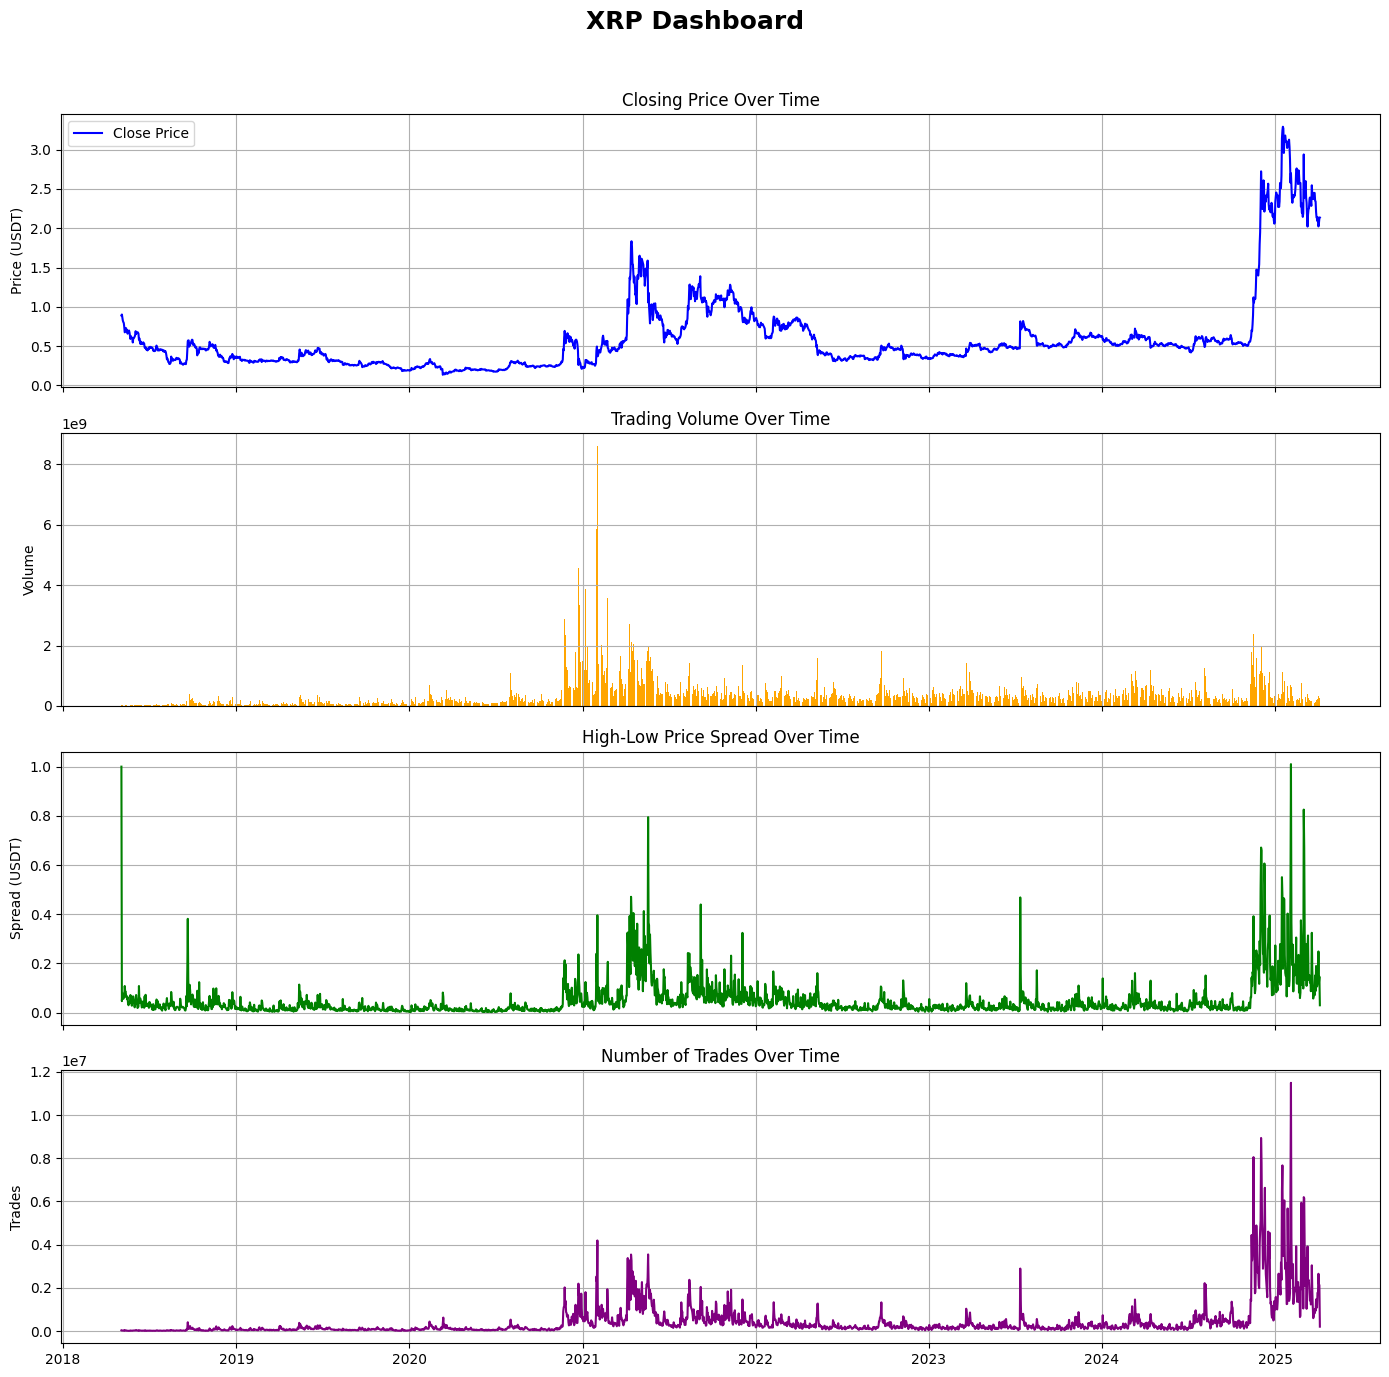


🔄 Fetching data for ADAUSDT...
  ✅ Up to: 2021-01-10
  ✅ Up to: 2023-10-07
  ✅ Up to: 2025-04-05
📊 Creating dashboard for ADA...


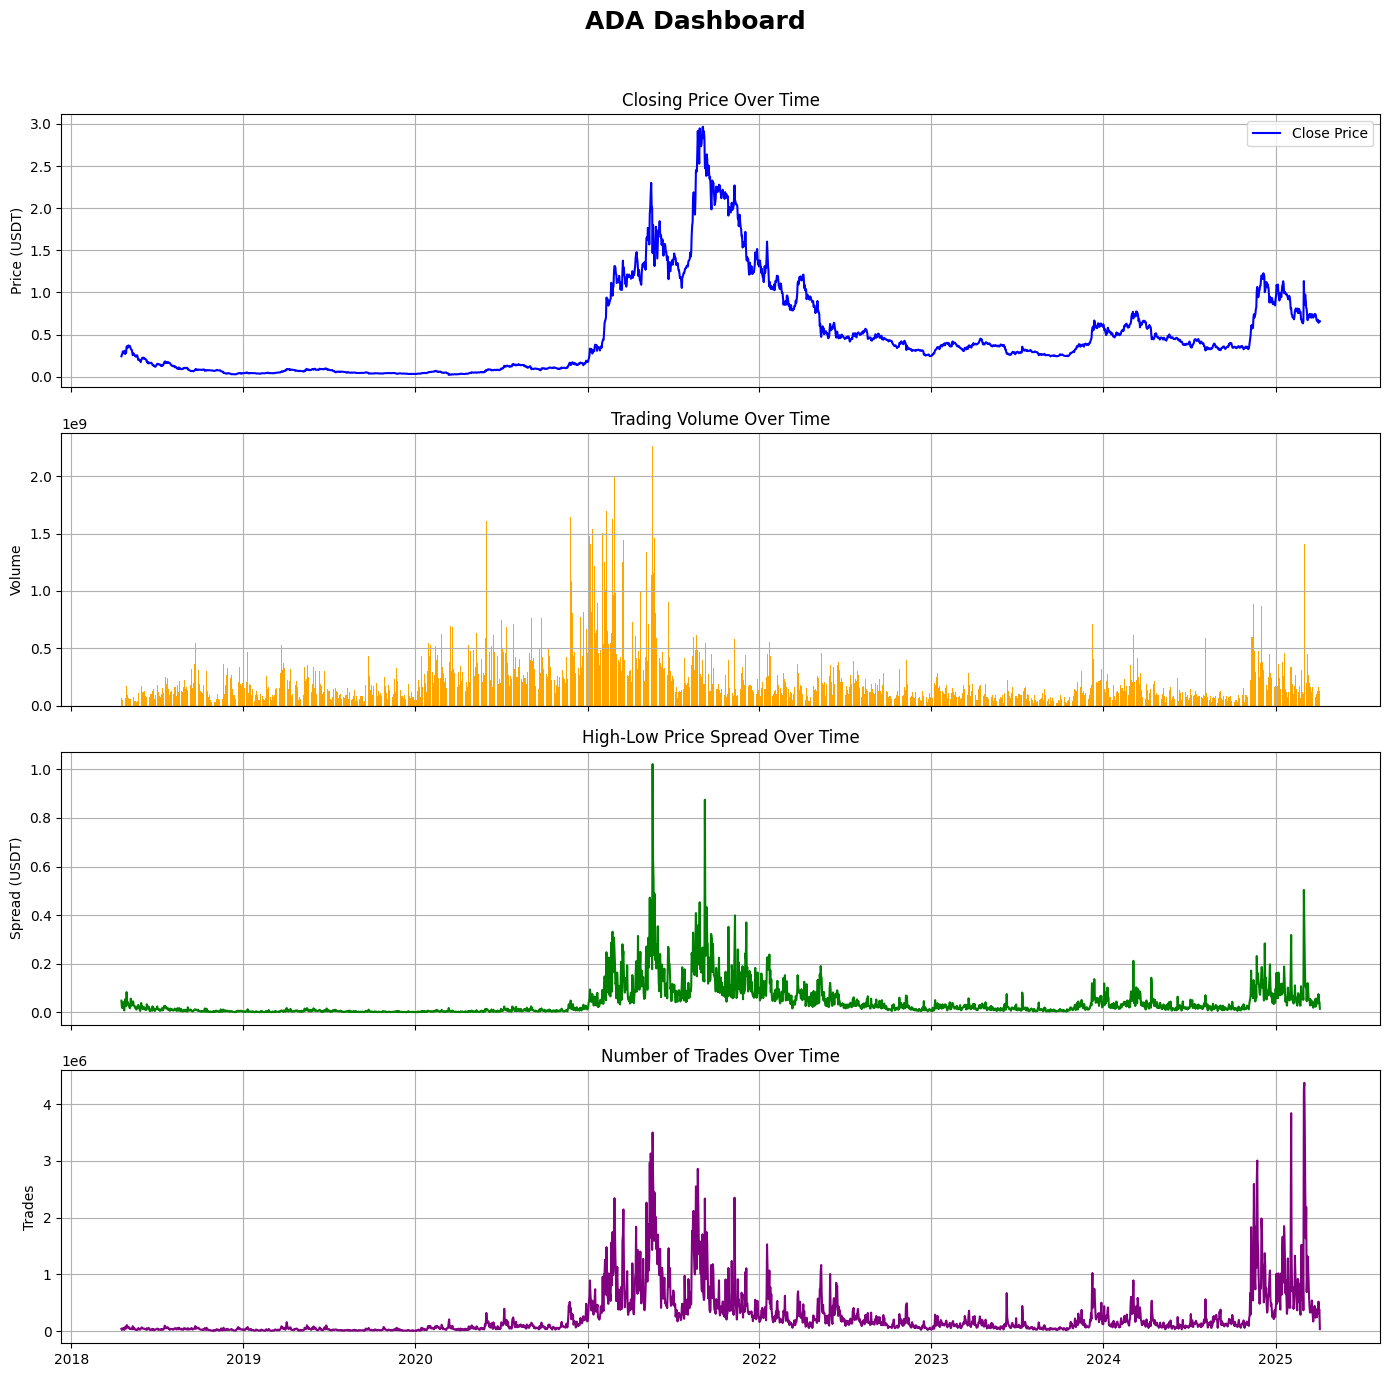


🔄 Fetching data for SOLUSDT...
  ✅ Up to: 2023-05-07
  ✅ Up to: 2025-04-05
📊 Creating dashboard for SOL...


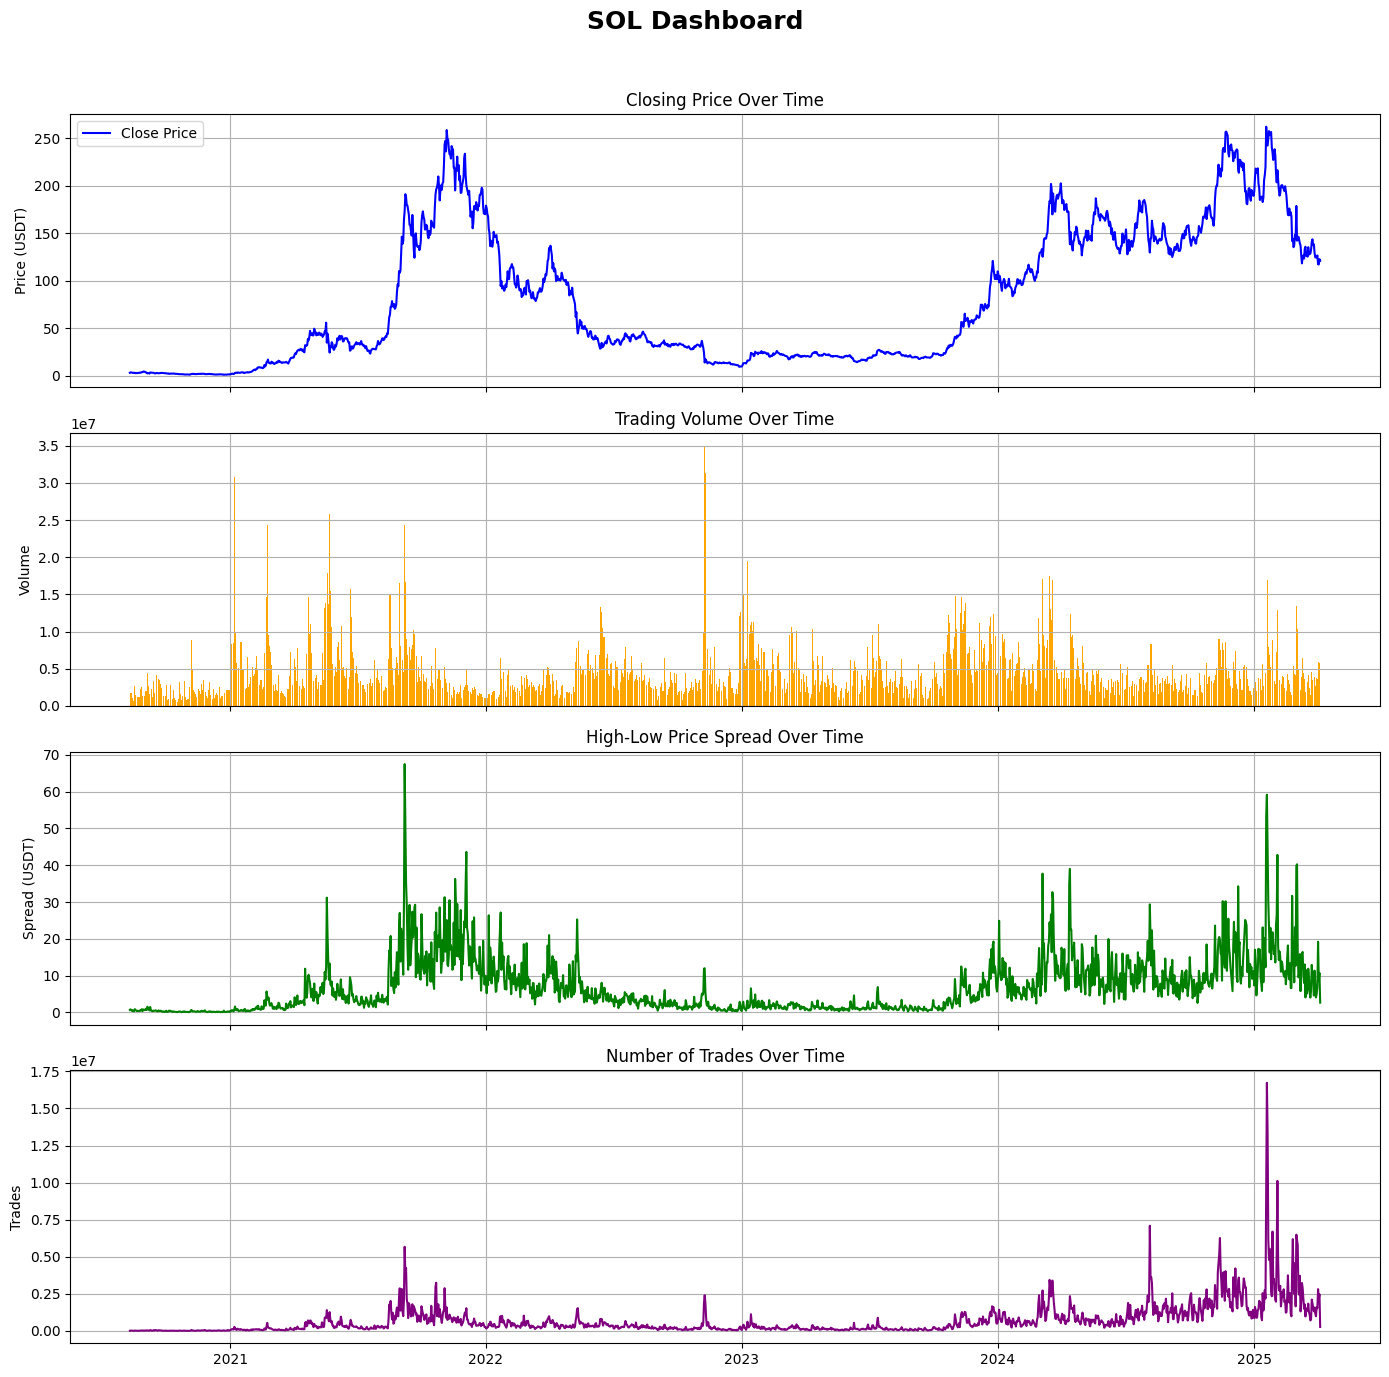


🔄 Fetching data for DOGEUSDT...
  ✅ Up to: 2022-03-30
  ✅ Up to: 2024-12-24
  ✅ Up to: 2025-04-05
📊 Creating dashboard for DOGE...


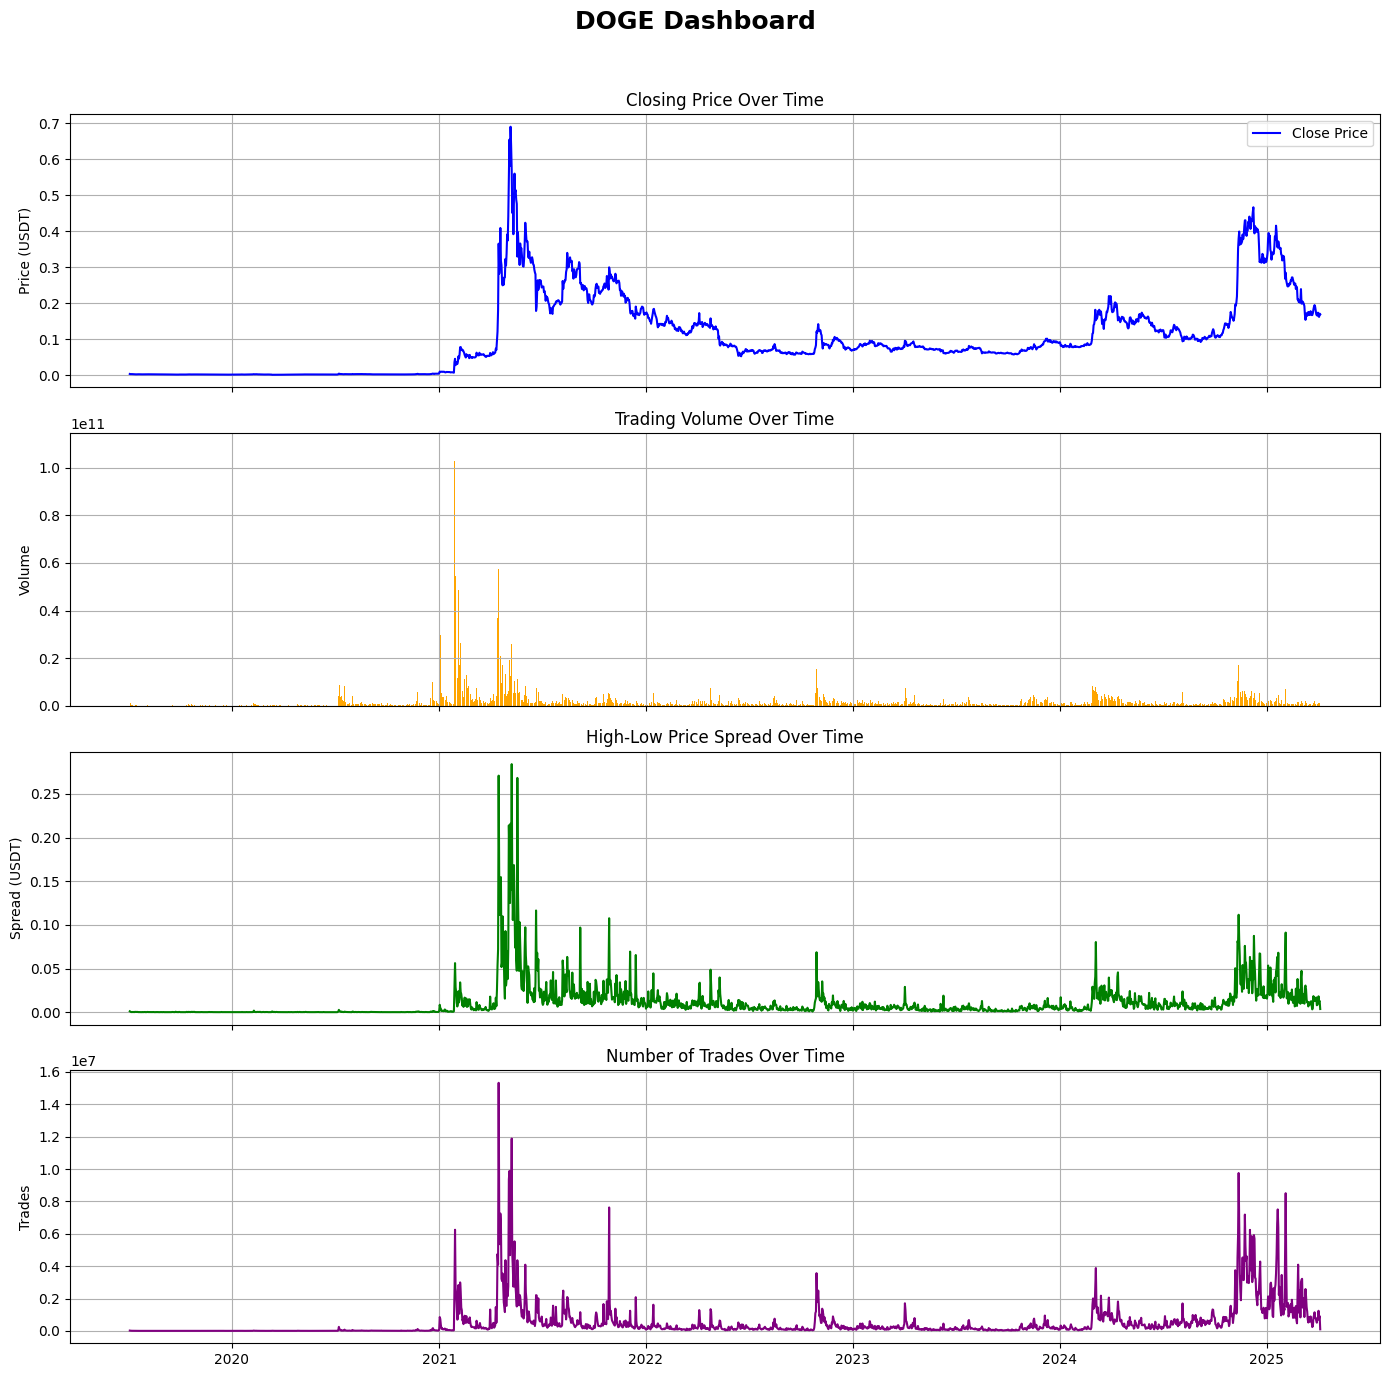


🔄 Fetching data for AVAXUSDT...
  ✅ Up to: 2023-06-18
  ✅ Up to: 2025-04-05
📊 Creating dashboard for AVAX...


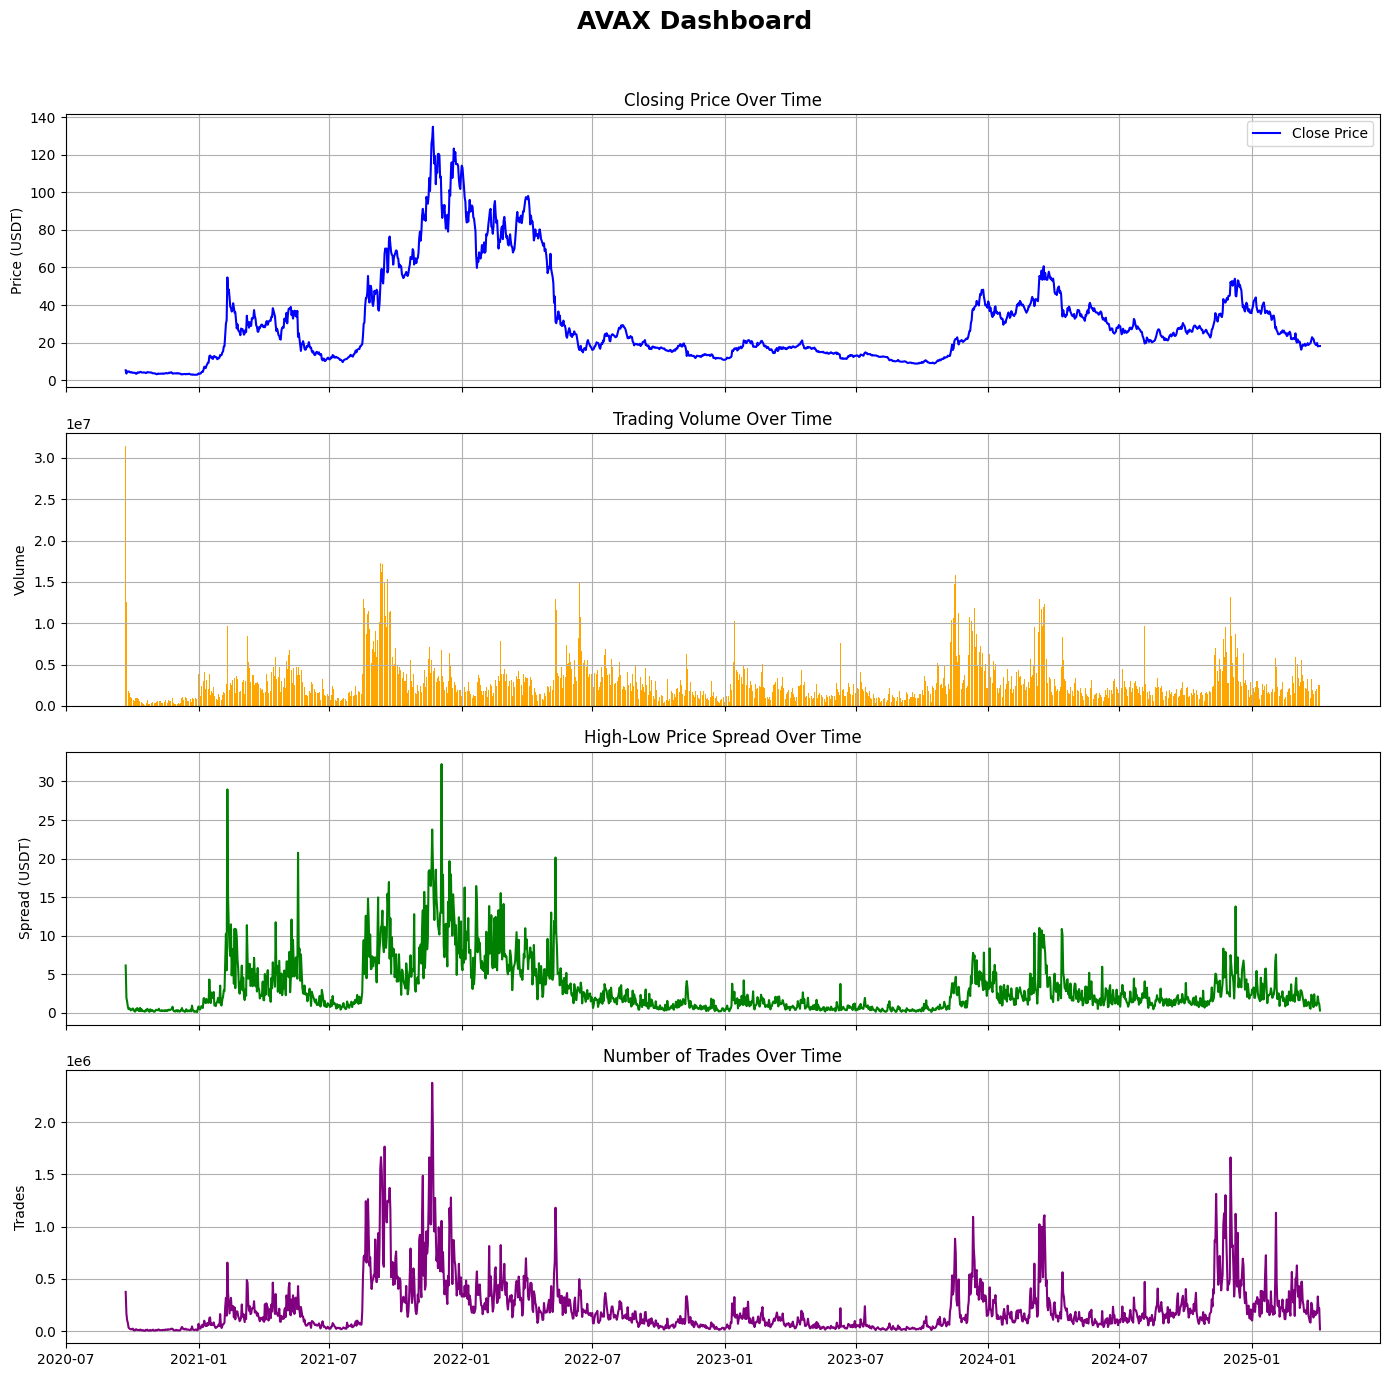


🔄 Fetching data for DOTUSDT...
  ✅ Up to: 2023-05-14
  ✅ Up to: 2025-04-05
📊 Creating dashboard for DOT...


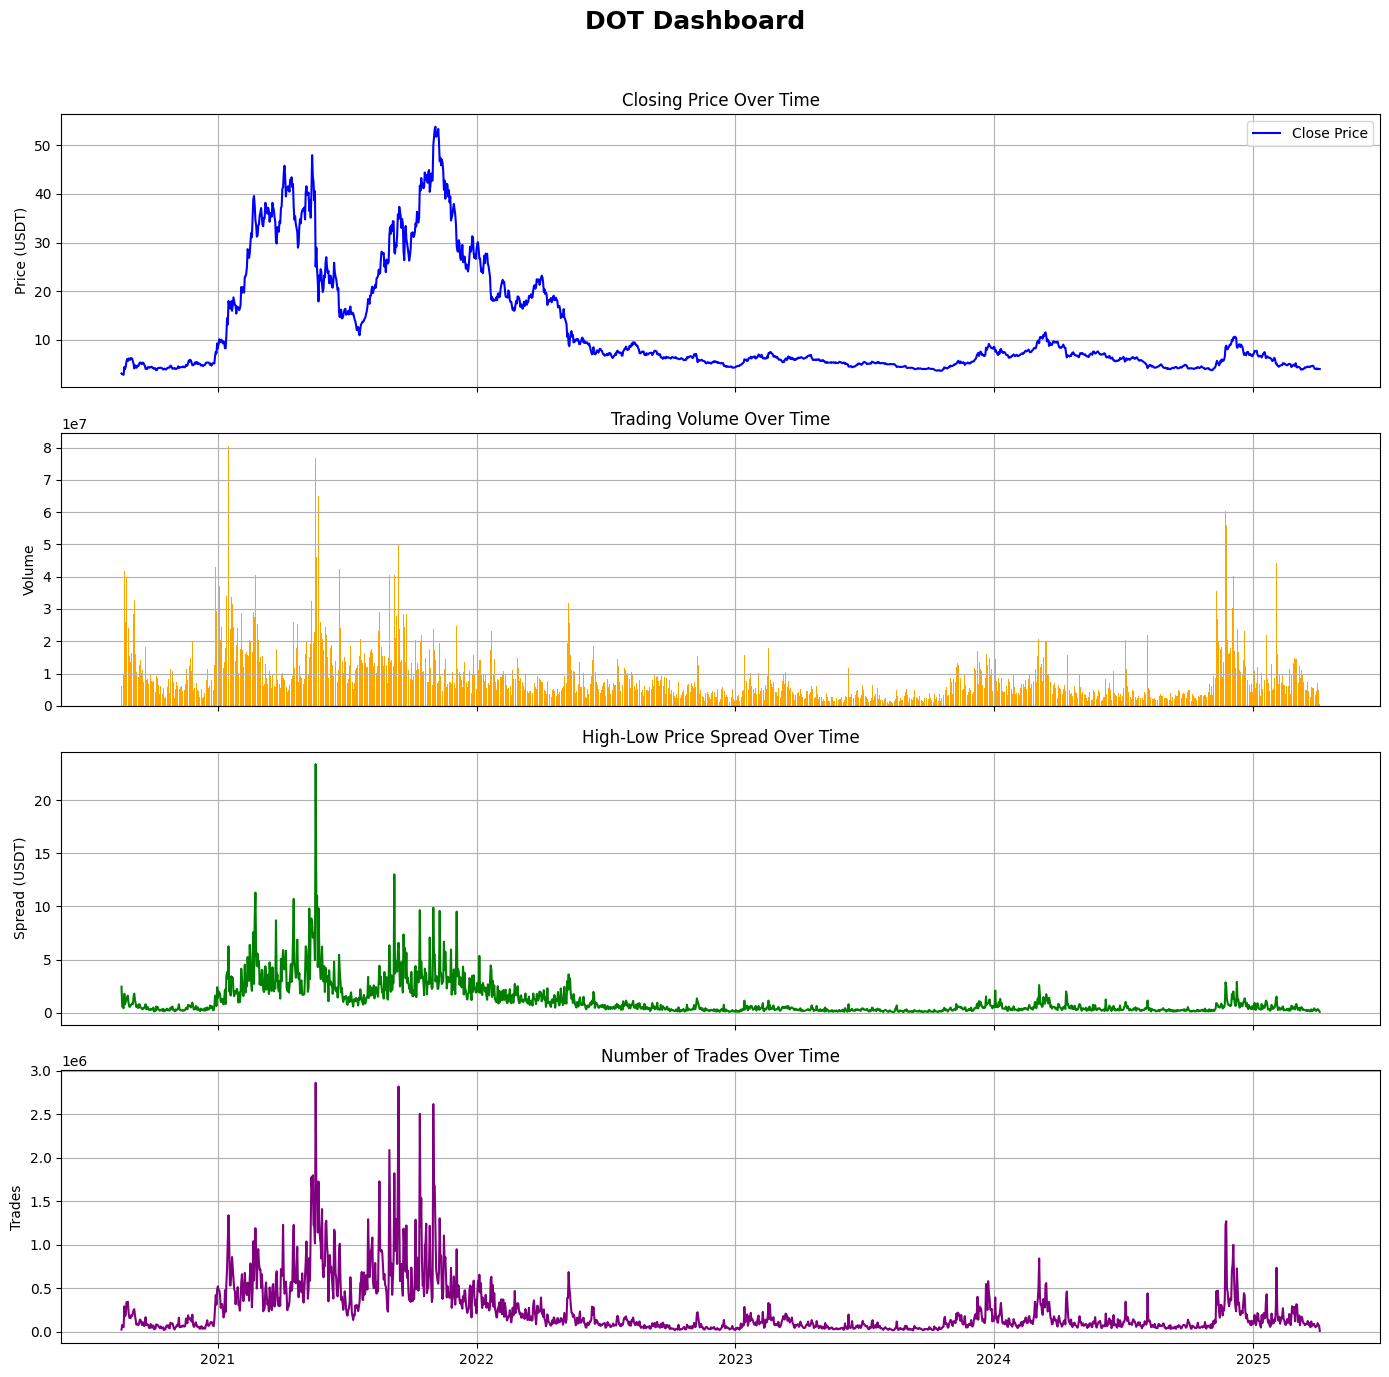


🔄 Fetching data for MATICUSDT...
  ✅ Up to: 2022-01-19
  ✅ Up to: 2024-09-10
⚠️ Error or no data for MATICUSDT
📊 Creating dashboard for MATIC...


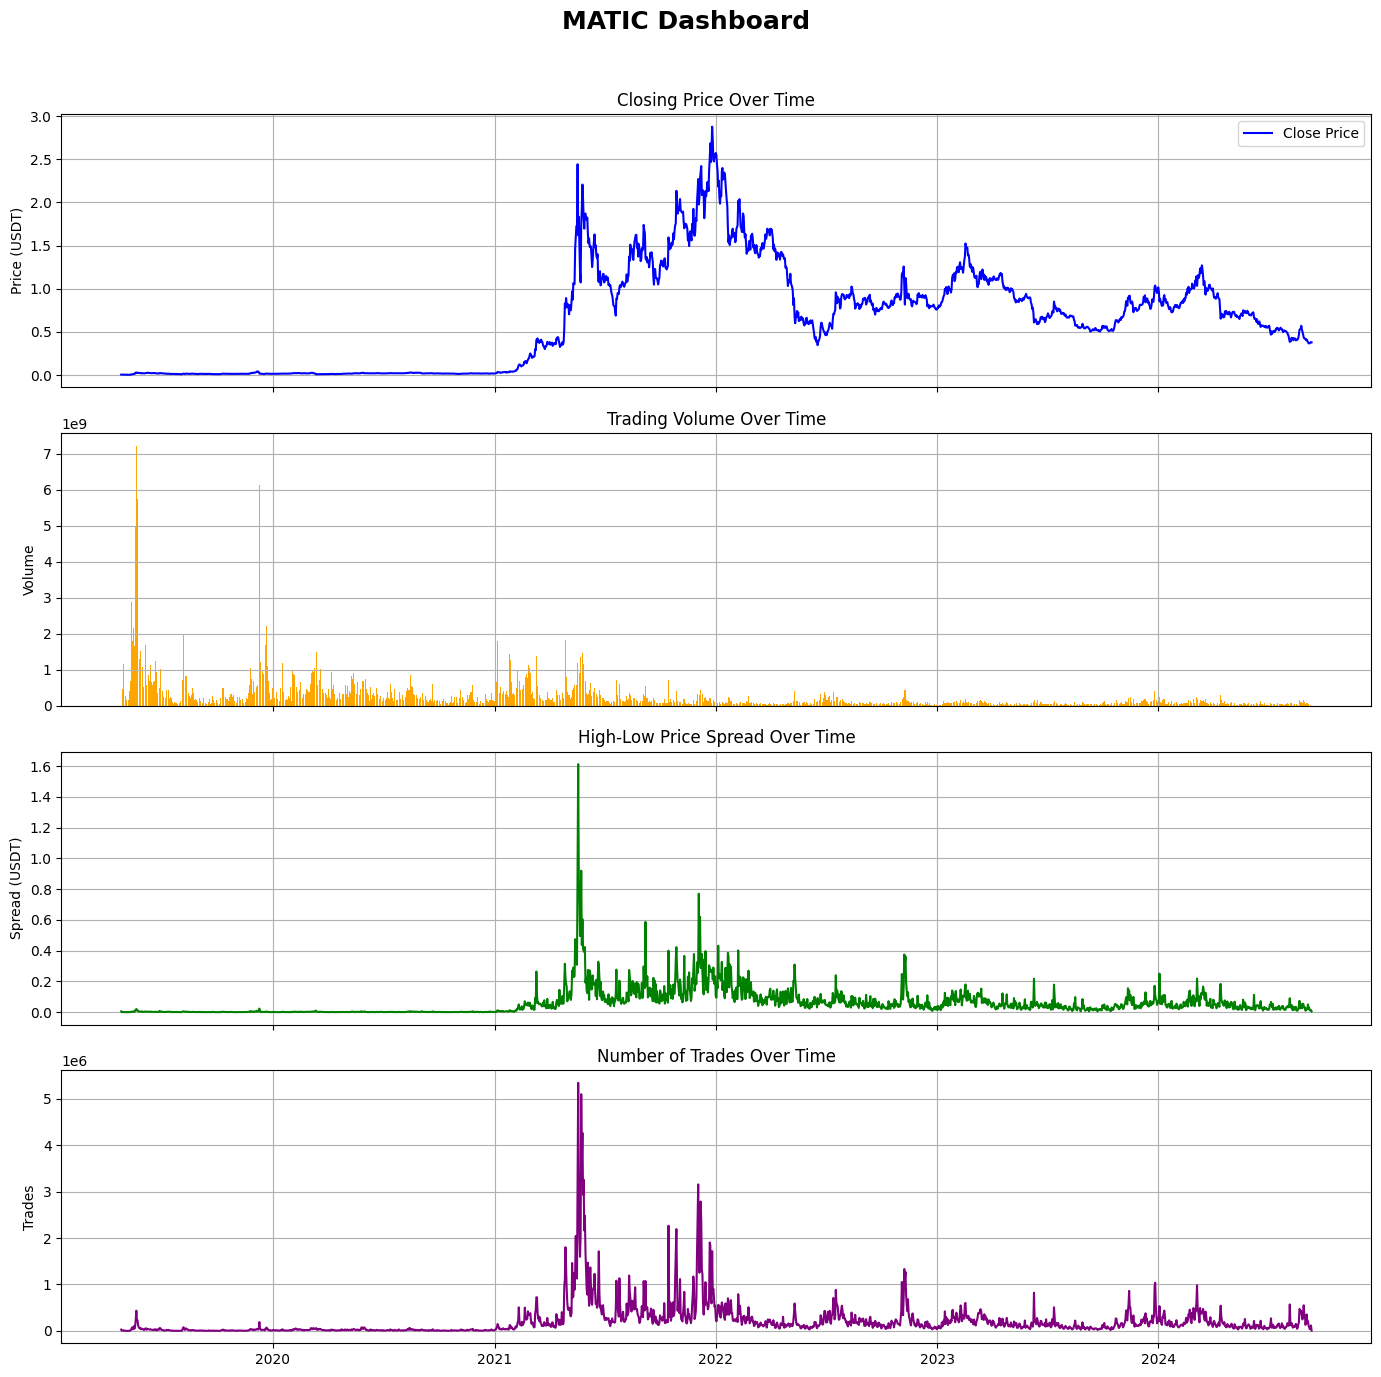


✅ All dashboards plotted and data saved to: C:\Users\Srushti S\OneDrive\Desktop\top_10_crypto_data.xlsx


In [14]:
import requests
import pandas as pd
import time
from datetime import datetime
from pathlib import Path
import matplotlib.pyplot as plt

# -------------------------------
# Excel Output Path
# -------------------------------
desktop = Path.home() / "Desktop"
if not desktop.exists():
    desktop = Path.home() / "OneDrive" / "Desktop"
output_file = desktop / "top_10_crypto_data.xlsx"

# -------------------------------
# Top 10 Crypto Symbols
# -------------------------------
symbols = [
    'BTCUSDT', 'ETHUSDT', 'BNBUSDT', 'XRPUSDT', 'ADAUSDT',
    'SOLUSDT', 'DOGEUSDT', 'AVAXUSDT', 'DOTUSDT', 'MATICUSDT'
]

interval = '1d'
start_str = '2017-08-01'

# -------------------------------
# Helper Functions
# -------------------------------
def date_to_ms(date_str):
    return int(datetime.strptime(date_str, "%Y-%m-%d").timestamp() * 1000)

def ms_to_date(ms):
    return datetime.utcfromtimestamp(ms / 1000.0)

url = 'https://api.binance.com/api/v3/klines'
start_ms_global = date_to_ms(start_str)
end_ms_global = int(time.time() * 1000)

# -------------------------------
# Fetch Binance OHLCV Data
# -------------------------------
def fetch_coin_data(symbol):
    start_ms = start_ms_global
    all_data = []

    print(f"\n🔄 Fetching data for {symbol}...")
    while start_ms < end_ms_global:
        params = {
            'symbol': symbol,
            'interval': interval,
            'startTime': start_ms,
            'limit': 1000
        }
        response = requests.get(url, params=params)
        data = response.json()

        if not data or 'code' in data:
            print(f"⚠️ Error or no data for {symbol}")
            break

        for k in data:
            all_data.append({
                'Date': ms_to_date(k[0]),
                'Open': float(k[1]),
                'High': float(k[2]),
                'Low': float(k[3]),
                'Close': float(k[4]),
                'Volume': float(k[5]),
                'Number of Trades': int(k[8])
            })

        print(f"  ✅ Up to: {ms_to_date(data[-1][0]).strftime('%Y-%m-%d')}")
        start_ms = data[-1][6] + 1
        time.sleep(0.4)

    return pd.DataFrame(all_data)

# -------------------------------
# Save Data + Plot Dashboard
# -------------------------------
with pd.ExcelWriter(output_file, engine='xlsxwriter') as writer:
    for symbol in symbols:
        df = fetch_coin_data(symbol)
        if df.empty:
            continue

        df['Date'] = pd.to_datetime(df['Date'])
        df.set_index('Date', inplace=True)

        sheet_name = symbol.replace('USDT', '')[:31]
        df.to_excel(writer, sheet_name=sheet_name)

        # 🛠 Auto-fit column width in Excel
        workbook  = writer.book
        worksheet = writer.sheets[sheet_name]
        worksheet.set_column('A:A', 20)  # Date column

        # 📊 Dashboard
        print(f"📊 Creating dashboard for {sheet_name}...")

        fig, axes = plt.subplots(4, 1, figsize=(14, 14), sharex=True)
        fig.suptitle(f'{sheet_name} Dashboard', fontsize=18, fontweight='bold')

        # Plot 1: Closing Price
        axes[0].plot(df.index, df['Close'], color='blue', label='Close Price')
        axes[0].set_title('Closing Price Over Time')
        axes[0].set_ylabel('Price (USDT)')
        axes[0].legend()
        axes[0].grid(True)

        # Plot 2: Volume
        axes[1].bar(df.index, df['Volume'], color='orange')
        axes[1].set_title('Trading Volume Over Time')
        axes[1].set_ylabel('Volume')
        axes[1].grid(True)

        # Plot 3: High-Low Spread
        spread = df['High'] - df['Low']
        axes[2].plot(df.index, spread, color='green')
        axes[2].set_title('High-Low Price Spread Over Time')
        axes[2].set_ylabel('Spread (USDT)')
        axes[2].grid(True)

        # Plot 4: Number of Trades
        axes[3].plot(df.index, df['Number of Trades'], color='purple')
        axes[3].set_title('Number of Trades Over Time')
        axes[3].set_ylabel('Trades')
        axes[3].grid(True)

        plt.tight_layout(rect=[0, 0, 1, 0.96])
        plt.show()

print(f"\n✅ All dashboards plotted and data saved to: {output_file}")
